In [288]:
#Cell one contains functions used to create SOU_data.csv
#They are modified from functions given by Dr. Fitz
"""

from lxml import html , cssselect
import dateparser
import requests
import json

def get_html(url):
    """
"""
    This function extracts the html code from a url
    :param url: 
    :return: html code from the web page referenced by url
    """
"""
    response = requests.get(url)  # get page data from server, block redirects
    source_code = response.content  # get string of source code from response
    return source_code


def get_data_table(source_code):
    """
"""
    This function creates a 2-D list of the following fields:
    [president_name, tenure, speech_link, speech_date, speech]
    The speech_date and speech are currently left blank.
    :param source_code: the html source code extracted from a url
    :return: a 2-D Python list or table
    """
"""
    data_table = []
    speech_table = None
    trs = None
    html_elem = html.document_fromstring(source_code)  # make HTML element object
    tables = html_elem.cssselect("table") # select the table element on the page

    # if you find a table, initialize the speech table to the first table
    if len(tables) > 0:
        speech_table = tables[0]

    # if you find the speech table, select its rows
    if speech_table is not None:
        trs = speech_table.cssselect("tr")

    # If you find rows in the table, go through each row
    # and process the data. Skip the header row (start at row 1)
    if trs is not None:
        for i in range(1, len(trs)):
            tr = trs[i]
            tds = tr.cssselect("td")
            president_name = ""

            # simple check to make sure the row has president name and speech url
            if len(tds) == 12:
                first_cell_data = tds[0].text_content().strip()
                tenure = tds[1].text_content().strip()
                # get the link element for the link to the speech
                speech_link_elmnt = tds[2].cssselect("a")
                speech_link = ""
                speech_date = ""
                speech = ""

                if len(first_cell_data) > 0:
                    president_name = first_cell_data

                if len(speech_link_elmnt) > 0:
                    speech_link = speech_link_elmnt[0].get("href")

                if len(president_name) > 0 and len(speech_link) > 0:
                    data_table.append([president_name, tenure, speech_link, speech_date, speech])
    return data_table


def scrape_data(url):
    """
"""
    :param url: the url to 
    :return: 
    """
"""
    return get_data_table(get_html(url))

def find_speech(data_table):
    for data in data_table:
        url = data[2]
        html_elem = html.document_fromstring(get_html(url))
        date_r = html_elem.find_class("field-docs-start-date-time")
        date = dateparser.parse(date_r[0].text_content())
        val  = html_elem.find_class("field-docs-content")
        speech = val[0].text_content()
        data[3] = date
        data[4] =speech
    return 0
def write_csv(data_table):
    f = open("SOU_data.csv", 'w+')
    for data in data_table:
        for val in data:
            if val != data[-1]:
                f.write("%s, " % str(val))
            else:
                f.write("%s\n" % str(val))
    f.close()
    return 0

def main():
    url = "https://www.presidency.ucsb.edu/" \
          "documents/presidential-documents-archive-guidebook/" \
          "annual-messages-congress-the-state-the-union"
    data_table = scrape_data(url)
    find_speech(data_table)
    """
"""
    Two for loops writes values to .c
    """
"""
    write_csv(data_table)


# call the main function to run the program
main()

"""

'\n    write_csv(data_table)\n\n\n# call the main function to run the program\nmain()\n\n'

In [289]:
import json
f = open("SOU_data.txt","r")
data_table =json.load(f)
output_string = "{:<25}{:<12}{:<12}{:<30}"
print(output_string.format("Name","Tenure","Speech Date","    Excerpt"))
for data in data_table:
    print(output_string.format(data[0],data[1],data[3][0:10],data[4][0:30]))

Name                     Tenure      Speech Date     Excerpt                   
Donald J. Trump          2017-pres.  2017-02-28      Thank you very much. Mr. S
Barack Obama             2013-2017   2013-02-12      Please, everybody, have a 
George W. Bush           2005-2009   2005-02-02      Mr. Speaker, Vice Presiden
William J. Clinton       1997-2001   1997-02-04      Mr. Speaker, Mr. Vice Pres
George Bush              1989-1993   1989-02-09      Mr. Speaker, Mr. President
Ronald Reagan            1985-1989   1985-02-06      Mr. Speaker, Mr. President
Lyndon B. Johnson        1965-1969   1965-01-04      Mr. Speaker, Mr. President
John F. Kennedy          1961-1963   1961-01-30      [As delivered in person be
Dwight D. Eisenhower     1957-1961   1957-01-10      To the Congress of the Uni
Harry S Truman           1949-1953   1949-01-05      Mr. President, Mr. Speaker
Franklin D. Roosevelt    1945        1945-01-06      Today, in pursuance of my 
Warren G. Harding        1921-1923   192

In [290]:
'''
count_sentences(speech): Counts the number of sentences in text.
count_words(speech): Counts the number of words in text.
count_syllables(speech): Counts the number of syllables in text.
compute_flesch_index(syllable_count, word_count, sentence_count): Computes the Flesch
Index for the given numbers of sentences, words, and syllables.
compute_grade_level(syllable_count, word_count, sentence_count):  Computes the Grade
Level Equivalent for the given numbers of sentences, words, and syllables.
classify_article_readability(flesch_index):  Returns the school/grade level in worded format 
based on Table 1
'''

'\ncount_sentences(speech): Counts the number of sentences in text.\ncount_words(speech): Counts the number of words in text.\ncount_syllables(speech): Counts the number of syllables in text.\ncompute_flesch_index(syllable_count, word_count, sentence_count): Computes the Flesch\nIndex for the given numbers of sentences, words, and syllables.\ncompute_grade_level(syllable_count, word_count, sentence_count):  Computes the Grade\nLevel Equivalent for the given numbers of sentences, words, and syllables.\nclassify_article_readability(flesch_index):  Returns the school/grade level in worded format \nbased on Table 1\n'

In [291]:
import re
def count_sentences(data):
    speech = data
    words = speech.split(' ')
    val=0
    for word in words:
        if word!= '' and word!='\n':
            if "." in word or "?" in word or "!" in word or ":" in word or ";" in word:
                val= val+1
    return val

In [292]:
def count_words(speech):
    count = speech.split()
    val = 0
    for word in count:
        if word!= '' and word!='\n':
            val=val+1
        if '-' in word:
            val=val+2
    return(val)

In [293]:
def count_syllables(speech):
    repeat=''
    words = speech.split()
    '''Looks for vowels, technically y could considered a syllable but is ignored here,
     This should account for all words'''
    vowels = ['a','e','i','o','u']
    s_sum = 0
    for word in words:
        count= 0
        if len(word)!=0 and word!= '' and word!='\n':
            for val in word:
                for vowel in vowels:
                    if val==vowel:
                        count=count+1
            if repeat == val:
                count= count-1
            if word[-2:-1]=='le':
                count=count+1
            if word[-2:-1]!='le' and word[-1]=='e':
                count = count-1
            if word[-2:-1]=='es':
                count=count-1
            if word[-2:-1]=='ed':
                count=count-1

            if count==0:
                count = count+1
            s_sum = count+s_sum
            repeat = val
    return s_sum
#

In [294]:
def compute_flesch_index(syllable_count, word_count, sentence_count):
    """
    print(word_count)
    print(syllable_count)
    print(sentence_count)
    print(syll_per_word)
    print(word_per_sentence)
    print(round((.39*(word_per_sentence)+11.8*(syll_per_word) - 15.59),2))
    """
    syll_per_word = (syllable_count/word_count)
    word_per_sentence =(word_count/sentence_count)
    ans=206.835-1.015*word_per_sentence-syll_per_word*84.6
    return round(ans,2)
def compute_grade_level(syllable_count, word_count, sentence_count):
    syll_per_word = (syllable_count/word_count)
    word_per_sentence =(word_count/sentence_count)
    level = 206.835-1.015*word_per_sentence-syll_per_word*84.6
    if 100 >= level > 90:
        return 5
    elif 90 >= level > 80:
        return 6
    elif 80 >= level > 70:
        return 7
    elif 70 >= level > 65:
        return 8
    elif 65 >= level > 60:
        return 9
    elif 60 >= level >55:
        return 10
    elif 65 >= level >50:
        return 11
    elif 55 >= level >50:
        return 12
    elif 50>= level >45:
        return 13
    elif 45 >= level >40:
        return 14
    elif 40 >= level >35:
        return 15
    elif 35>= level > 30:
        return 16
    else:
        return 17
    
def classify_article_readability(flesch_index):
    f=flesch_index
    if f>=13:
        return "College" 
    elif f==17:
        return "Graduate"
    else:
        return "%ith Grade"%f

In [295]:
"""
Combining Above Functions to add additional info to data_table
"""
for data in data_table:
    data.append(compute_flesch_index(count_syllables(data[4]),count_words(data[4]),count_sentences(data[4])))
    data.append(compute_grade_level(count_syllables(data[4]),count_words(data[4]),count_sentences(data[4])))
    data.append(classify_article_readability(data[-1]))
output_string = "{:<25}{:<12}{:<12}{:<30}  {:<10} {:<20}{:<25}"
print(output_string.format("Name","Tenure","Speech Time","    Excerpt", "Flesch", "Grade Level #","Grade Level","Grade"))
for data in data_table:
    print(output_string.format(data[0],data[1],data[3][0:10],data[4][0:30],data[5],data[6],data[7]))

Name                     Tenure      Speech Time     Excerpt                     Flesch     Grade Level #       Grade Level              
Donald J. Trump          2017-pres.  2017-02-28      Thank you very much. Mr. S  50.57      11                  11th Grade               
Barack Obama             2013-2017   2013-02-12      Please, everybody, have a   51.6       11                  11th Grade               
George W. Bush           2005-2009   2005-02-02      Mr. Speaker, Vice Presiden  42.14      14                  College                  
William J. Clinton       1997-2001   1997-02-04      Mr. Speaker, Mr. Vice Pres  52.1       11                  11th Grade               
George Bush              1989-1993   1989-02-09      Mr. Speaker, Mr. President  54.28      11                  11th Grade               
Ronald Reagan            1985-1989   1985-02-06      Mr. Speaker, Mr. President  45.74      13                  College                  
Lyndon B. Johnson        1965-1969

<BarContainer object of 15 artists>

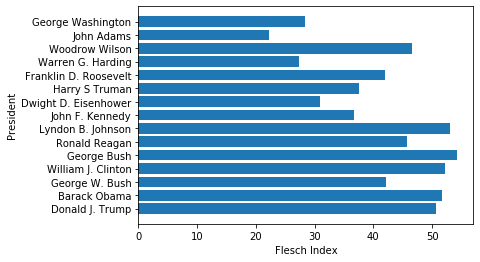

In [296]:
from matplotlib import pyplot as plt
f_data = []
f_names = []
for data in data_table:
    f_data.append(data[5])
    f_names.append(data[0])
fig,ax = plt.subplots()
plt.xlabel("Flesch Index")
plt.ylabel("President")
plt.barh(f_names,f_data, label = 'President Names')